## Analyze the shopping trend dataset by answering the questions below.

> **IMPORTANT** write your insights after each question


# Read the data


In [81]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()
#df.shape

/var/folders/gb/3gd6t2dn1r30w_t1ld_0b9_r0000gn/T/ipykernel_11300/1304503281.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# Question 1

What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?

- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?


Text(0.5, 1.0, 'Purchase Amount of Subscription Status')

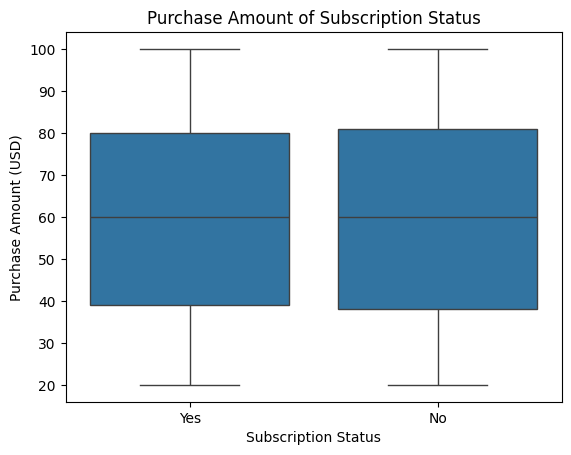

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.boxplot(x='Subscription Status',
            y='Purchase Amount (USD)',
            data=df)
plt.title('Purchase Amount of Subscription Status')


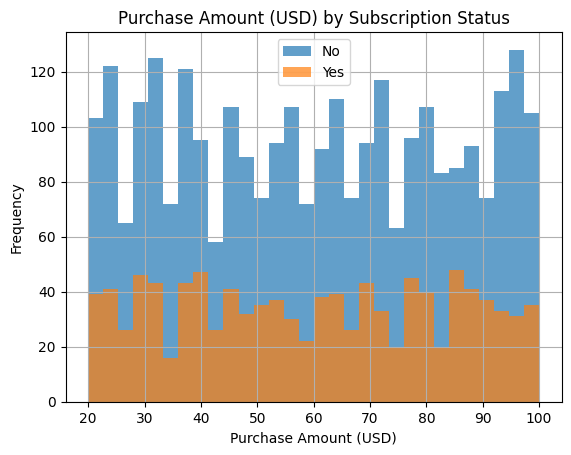

In [ ]:
df.groupby('Subscription Status')['Purchase Amount (USD)'].hist(bins=30,alpha=0.7,legend=True)
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.title('Purchase Amount (USD) by Subscription Status')
plt.show()

# Question 2

Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .

- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.


Payment Method
PayPal           677
Credit Card      671
Cash             670
Debit Card       636
Venmo            634
Bank Transfer    612
Name: count, dtype: int64


Text(0.5, 1.0, 'frequency of each Payment Method')

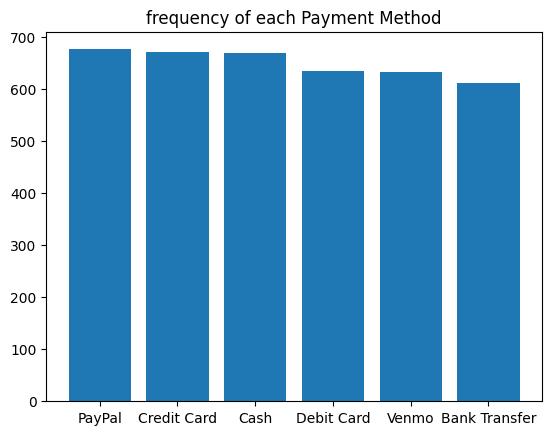

In [18]:
df.head(5)
freq=df['Payment Method'].value_counts()
print(freq)
plt.bar(freq.index,freq.values)
plt.title('frequency of each Payment Method')




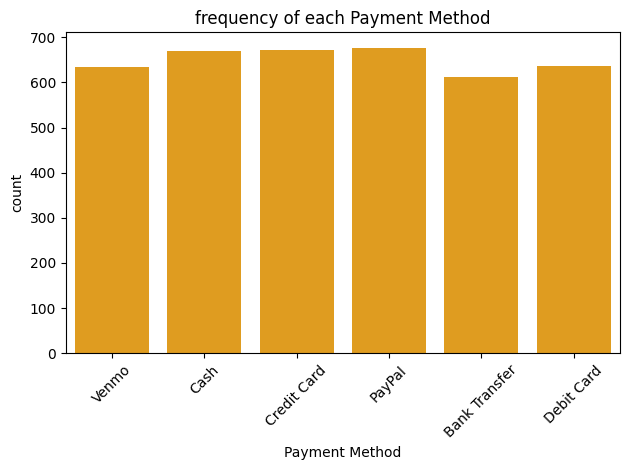

In [31]:
plt.Figure(figsize=(8,6))
sns.countplot(x=df['Payment Method'],color='Orange')
plt.title('frequency of each Payment Method')
plt.xticks(rotation=45)

plt.tight_layout()



# Question 3

Show the number of purchases made by each `Gender` in each `Season`.

- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.


Text(0.5, 1.0, 'Average Purchase Amount by Season and Gender')

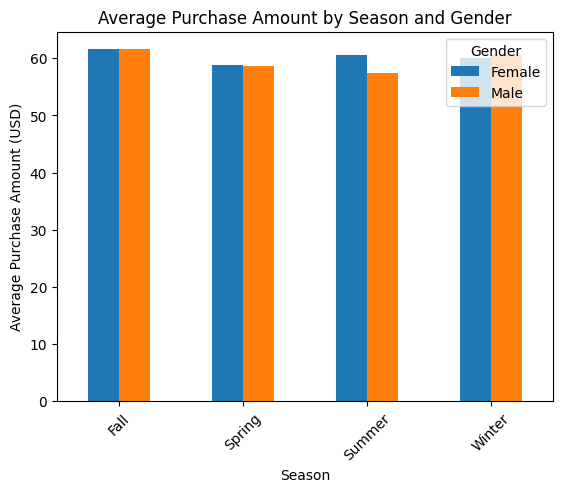

In [47]:

grouped = df.groupby(['Season', 'Gender'])['Purchase Amount (USD)'].mean().unstack()
grouped.plot(kind='bar')

plt.xticks(rotation=45)
plt.ylabel('Average Purchase Amount (USD)')
plt.title('Average Purchase Amount by Season and Gender')

<Axes: xlabel='Season', ylabel='Purchase Amount (USD)'>

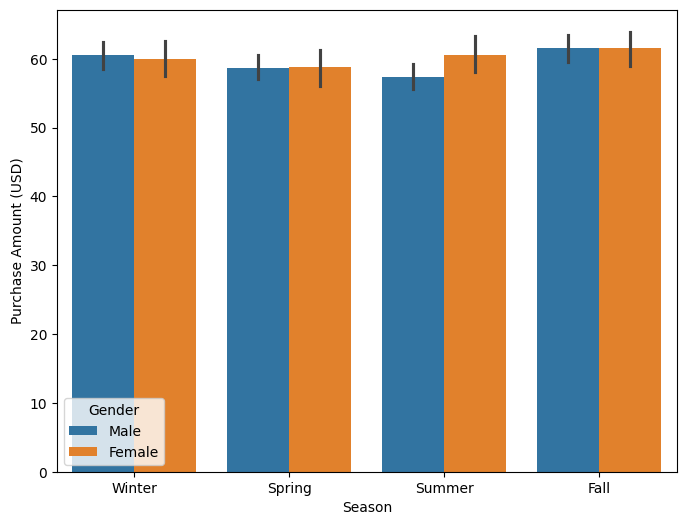

In [37]:
df.head()
plt.figure(figsize=(8, 6))
sns.barplot(y='Purchase Amount (USD)', x='Season',hue="Gender", data=df)




# Question 4

Create a heatmap showing the correlation between all numeric columns.

- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'Customer ID'),
  Text(1.5, 0, 'Age'),
  Text(2.5, 0, 'Purchase Amount (USD)'),
  Text(3.5, 0, 'Review Rating'),
  Text(4.5, 0, 'Previous Purchases')])

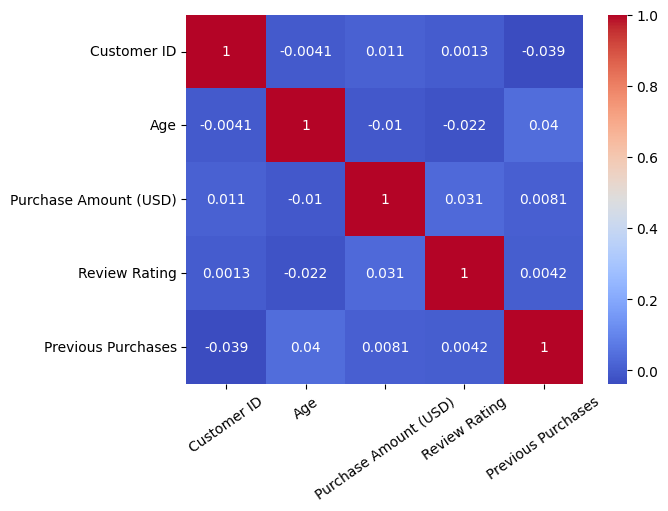

In [69]:
plt.Figure(figsize=(10,6))
numeric=df.select_dtypes(include=['float64', 'int64'])
corr=numeric.corr()
sns.heatmap(corr,annot=True,cmap=('coolwarm'))
plt.xticks(rotation=35)
#plt.tight_layout()

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Purchase Amount (USD)'),
  Text(1.5, 0, 'Previous Purchases'),
  Text(2.5, 0, 'Review Rating')])

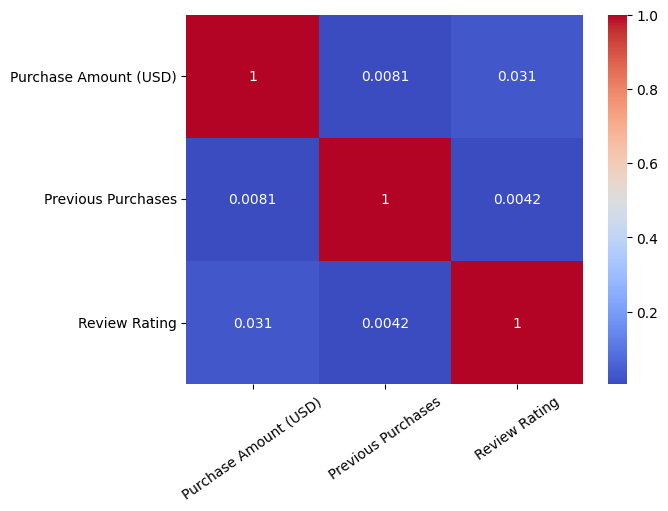

In [73]:
plt.Figure(figsize=(10,6))
numeric=df.loc[:,['Purchase Amount (USD)','Previous Purchases','Review Rating']]
corr=numeric.corr()
sns.heatmap(corr,annot=True,cmap=('coolwarm'))
plt.xticks(rotation=35)
#plt.tight_layout()

# Question 5

Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.

- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.


['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',

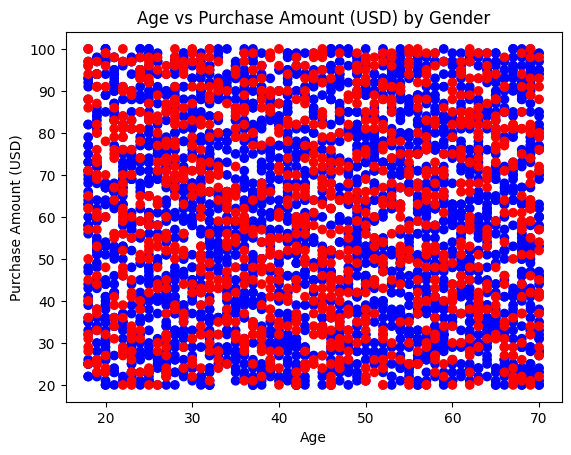

In [103]:
df.head(5)
colors=["blue" if x =="Male" else "red" for x in df['Gender']]
print(colors)
plt.scatter(x=df['Age'],y=df['Purchase Amount (USD)'],c=colors)
plt.title("""Age vs Purchase Amount (USD) by Gender""")
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()

Text(0.5, 1.0, 'Age vs Purchase Amount (USD) by Gender')

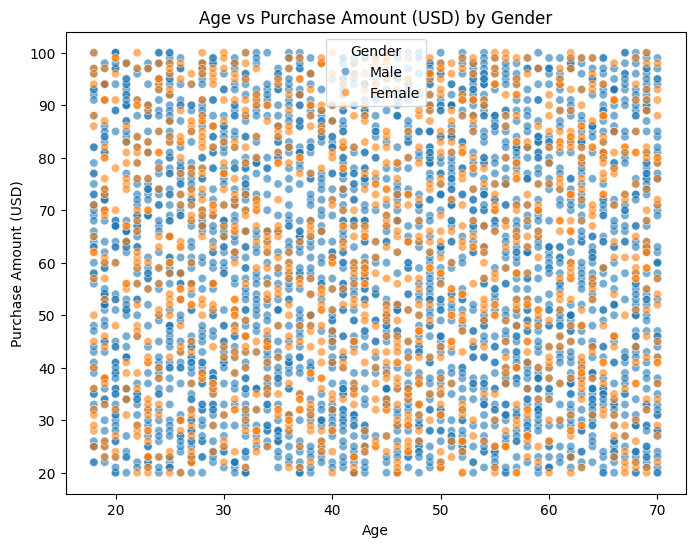

In [111]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'],y=df['Purchase Amount (USD)'],hue=df['Gender'],alpha=0.6)
plt.title("""Age vs Purchase Amount (USD) by Gender""")


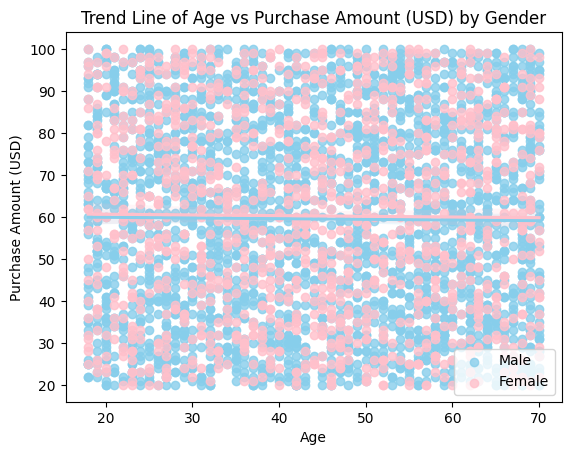

In [ ]:
sns.regplot(x='Age',y='Purchase Amount (USD)',data=df[df['Gender']=="Male"], color='skyblue',label='Male')
sns.regplot(x='Age',y='Purchase Amount (USD)',data=df[df['Gender']=="Female"], color='pink',label='Female')
plt.title("Age vs Purchase Amount (USD) by Gender")
plt.legend()

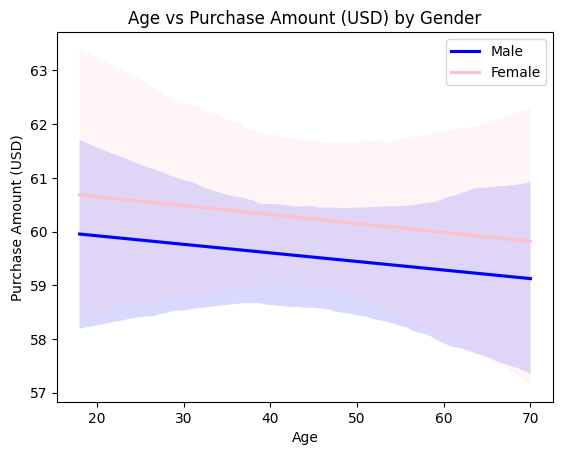

In [126]:
sns.regplot(x='Age',y='Purchase Amount (USD)',data=df[df['Gender']=="Male"],scatter=False,color='blue',label='Male')
sns.regplot(x='Age',y='Purchase Amount (USD)',data=df[df['Gender']=="Female"], scatter=False,color='pink',label='Female')
plt.title("Age vs Purchase Amount (USD) by Gender")
plt.legend()

# Question 6

How does the average review rating differ across different item `Categories` and `Sizes`?

- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.


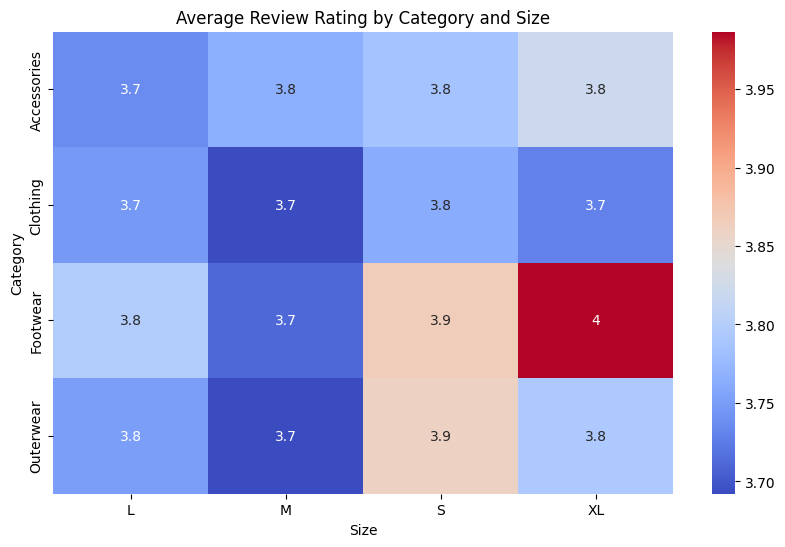

In [135]:
pivot=df.pivot_table(index='Category', columns='Size',values='Review Rating', aggfunc='mean')
pivot
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='coolwarm')
plt.title('Average Review Rating by Category and Size')
plt.ylabel('Category')
plt.xlabel('Size')
plt.show()

# Question 7

Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?

- Show this as a **grouped bar chart** and as a **heatmap**.


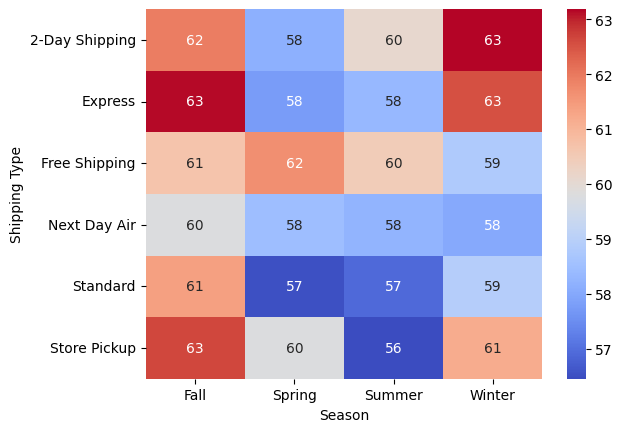

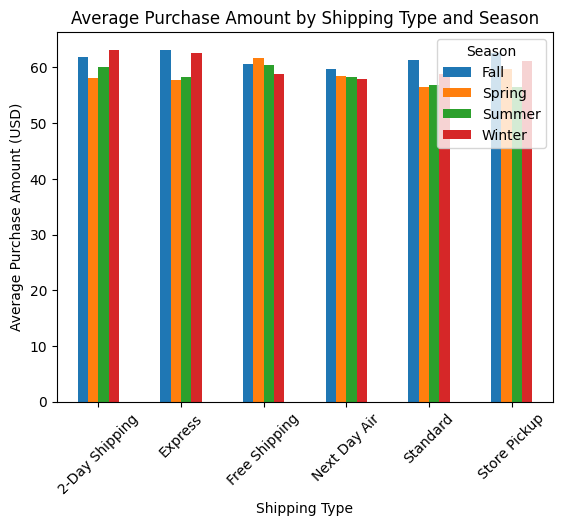

In [151]:
pivot=df.pivot_table(index='Shipping Type',columns='Season',values='Purchase Amount (USD)', aggfunc='mean')

sns.heatmap(pivot,annot=True,cmap='coolwarm')
plt.show()
print('='*50)

plt.Figure(figsize=(14,10))
pivot.plot(kind='bar')
plt.title('Average Purchase Amount by Shipping Type and Season')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

# Question 8

Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.

- Use `sns.violinplot` with `hue`.


In [152]:
df.head(

)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


Text(0.5, 1.0, 'Review Rating by Gender and Subscription Status')

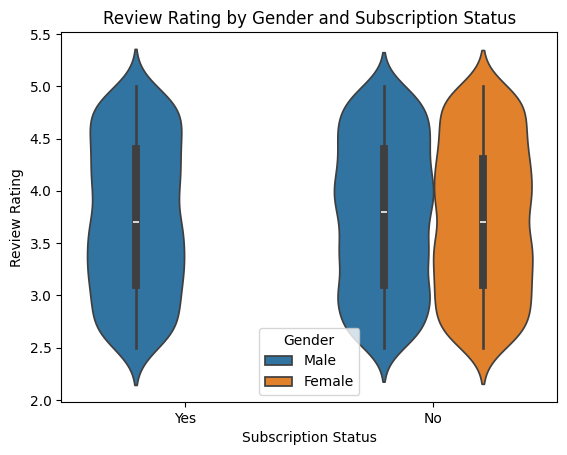

In [154]:
sns.violinplot(x='Subscription Status',y='Review Rating',hue='Gender',data=df)
plt.title('Review Rating by Gender and Subscription Status')

# Question 9

What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?

- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.


In [171]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(
    x: 'ArrayLike',
    *,
    explode: 'ArrayLike | None' = None,
    labels: 'Sequence[str] | None' = None,
    colors: 'ColorType | Sequence[ColorType] | None' = None,
    autopct: 'str | Callable[[float], str] | None' = None,
    pctdistance: 'float' = 0.6,
    shadow: 'bool' = False,
    labeldistance: 'float | None' = 1.1,
    startangle: 'float' = 0,
    radius: 'float' = 1,
    counterclock: 'bool' = True,
    wedgeprops: 'dict[str, Any] | None' = None,
    textprops: 'dict[str, Any] | None' = None,
    center: 'tuple[float, float]' = (0, 0),
    frame: 'bool' = False,
    rotatelabels: 'bool' = False,
    normalize: 'bool' = True,
    hatch: 'str | Sequence[str] | None' = None,
    data=None
) -> 'tuple[list[Wedge], list[Text]] | tuple[list[Wedge], list[Text], list[Text]]'
    Plot a pie chart.

    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.

    The wedges are plotted 

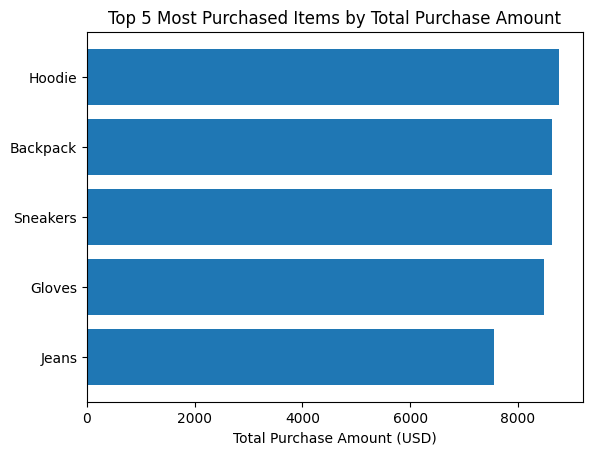

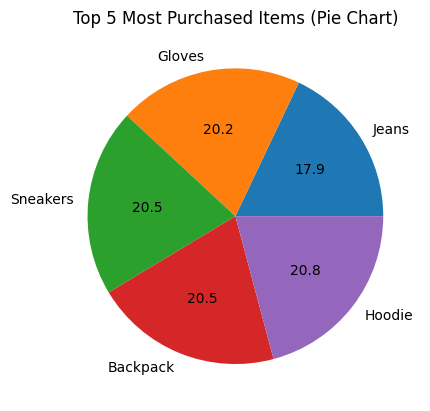

In [180]:
grouped=df.groupby('Item Purchased')['Purchase Amount (USD)'].sum()

grouped.sort_values(ascending=True,inplace=True)
top5=grouped.head(5)
plt.Figure(figsize=(20,6))
plt.barh(top5.index,top5.values)
plt.title('Top 5 Most Purchased Items (Pie Chart)')
plt.xlabel('Total Purchase Amount (USD)')
plt.title('Top 5 Most Purchased Items by Total Purchase Amount')
plt.show()

plt.pie(top5,autopct="%1.1f",labels=top5.index)
plt.title('Top 5 Most Purchased Items (Pie Chart)')
plt.show()


# Question 10

Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?

- Use a **Seaborn scatterplot** with size/marker variation.


      Customer ID  Age  Gender Item Purchased     Category  \
10             11   53    Male          Shoes     Footwear   
16             17   25    Male     Sunglasses  Accessories   
22             23   56    Male          Pants     Clothing   
39             40   70    Male          Pants     Clothing   
41             42   67    Male          Scarf  Accessories   
...           ...  ...     ...            ...          ...   
3845         3846   58  Female        Sweater     Clothing   
3866         3867   58  Female            Hat  Accessories   
3869         3870   26  Female           Coat    Outerwear   
3889         3890   57  Female          Dress     Clothing   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)    Location Size      Color  Season  \
10                       34    Arkansas    L     Purple    Fall   
16                       36     Alabama    S       Gray  Spring   
22                       37  California    M      Peac

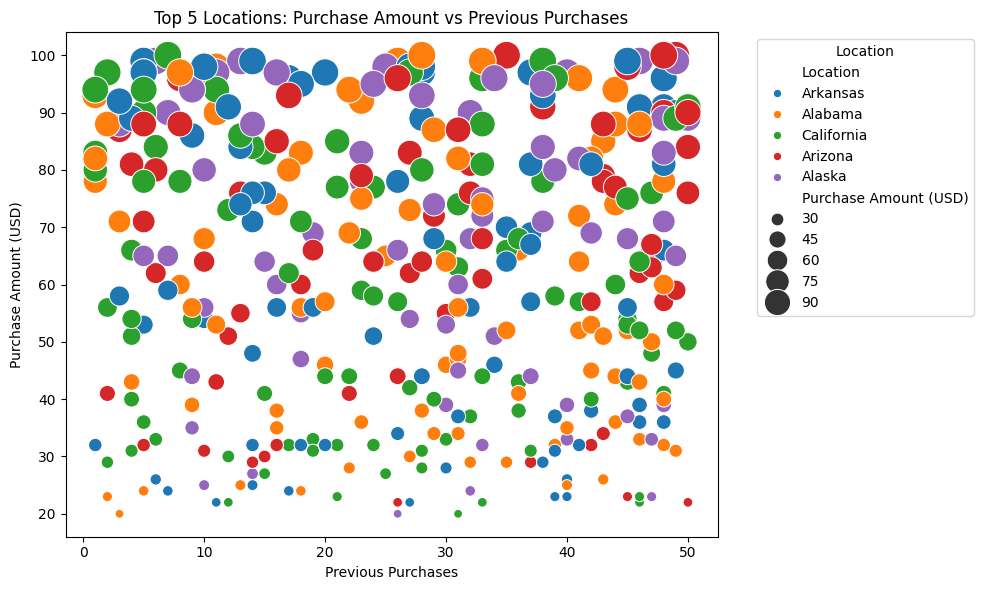

In [205]:

top_locations = df.groupby('Location')['Purchase Amount (USD)'].mean().head(5).index
top_locations

df_top = df[df['Location'].isin(top_locations)]
print(df_top)

plt.figure(figsize=(10, 6))

sns.scatterplot(
   data=df_top,
   x='Previous Purchases',
   y='Purchase Amount (USD)',
   hue='Location',
   size='Purchase Amount (USD)',
   sizes=(40, 400)
)
plt.title('Top 5 Locations: Purchase Amount vs Previous Purchases')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Question 11

Using a crosstab, find how `Gender` and `Size` interact.

- Plot using `sns.heatmap`.


In [210]:
import pandas as pd 
help(pd.crosstab)

Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(
    index,
    columns,
    values=None,
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins: 'bool' = False,
    margins_name: 'Hashable' = 'All',
    dropna: 'bool' = True,
    normalize: "bool | Literal[0, 1, 'all', 'index', 'columns']" = False
) -> 'DataFrame'
    Compute a simple cross tabulation of two (or more) factors.

    By default, computes a frequency table of the factors unless an
    array of values and an aggregation function are passed.

    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows.
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns.
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    rownames : sequence, default None
        If passed, must match number of row ar

Size,L,M,S,XL
Gender,,,,
Female,337,590,187,134
Male,716,1165,476,295


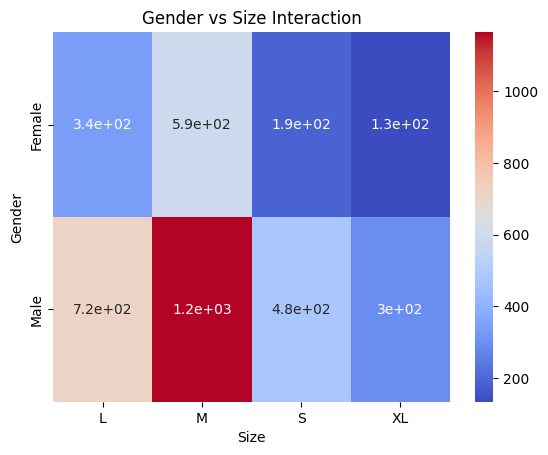

In [215]:
import pandas as pd 
corr=pd.crosstab(df['Gender'],df['Size'])
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title('Gender vs Size Interaction')
corr

# Question 12

How does the frequency of purchases column influence the use of promo codes?

- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.


In [216]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


Promo Code Used          No  Yes
Frequency of Purchases          
Annually                334  238
Bi-Weekly               321  226
Every 3 Months          326  258
Fortnightly             299  243
Monthly                 316  237
Quarterly               322  241
Weekly                  305  234


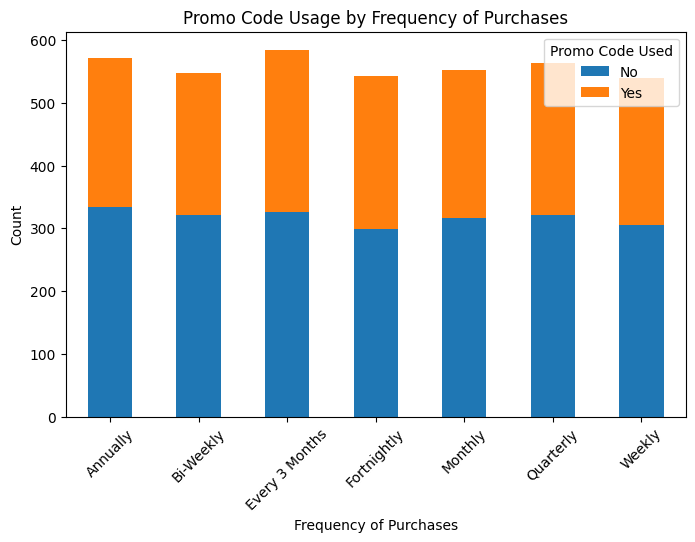

In [228]:
promo_freq = pd.crosstab(df['Frequency of Purchases'], df['Promo Code Used'])
print(promo_freq)
promo_freq.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Promo Code Usage by Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Promo Code Used')
plt.show()

Text(0.5, 1.0, 'Promo Code Usage by Frequency of Purchases ')

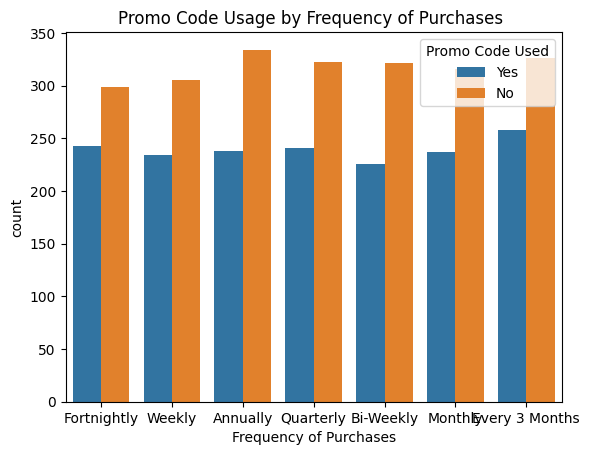

In [227]:
sns.countplot(data=df,x='Frequency of Purchases',hue='Promo Code Used')
plt.title('Promo Code Usage by Frequency of Purchases ')

# Question 13

Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.

- Use `sns.pairplot` with `hue="Gender"`.


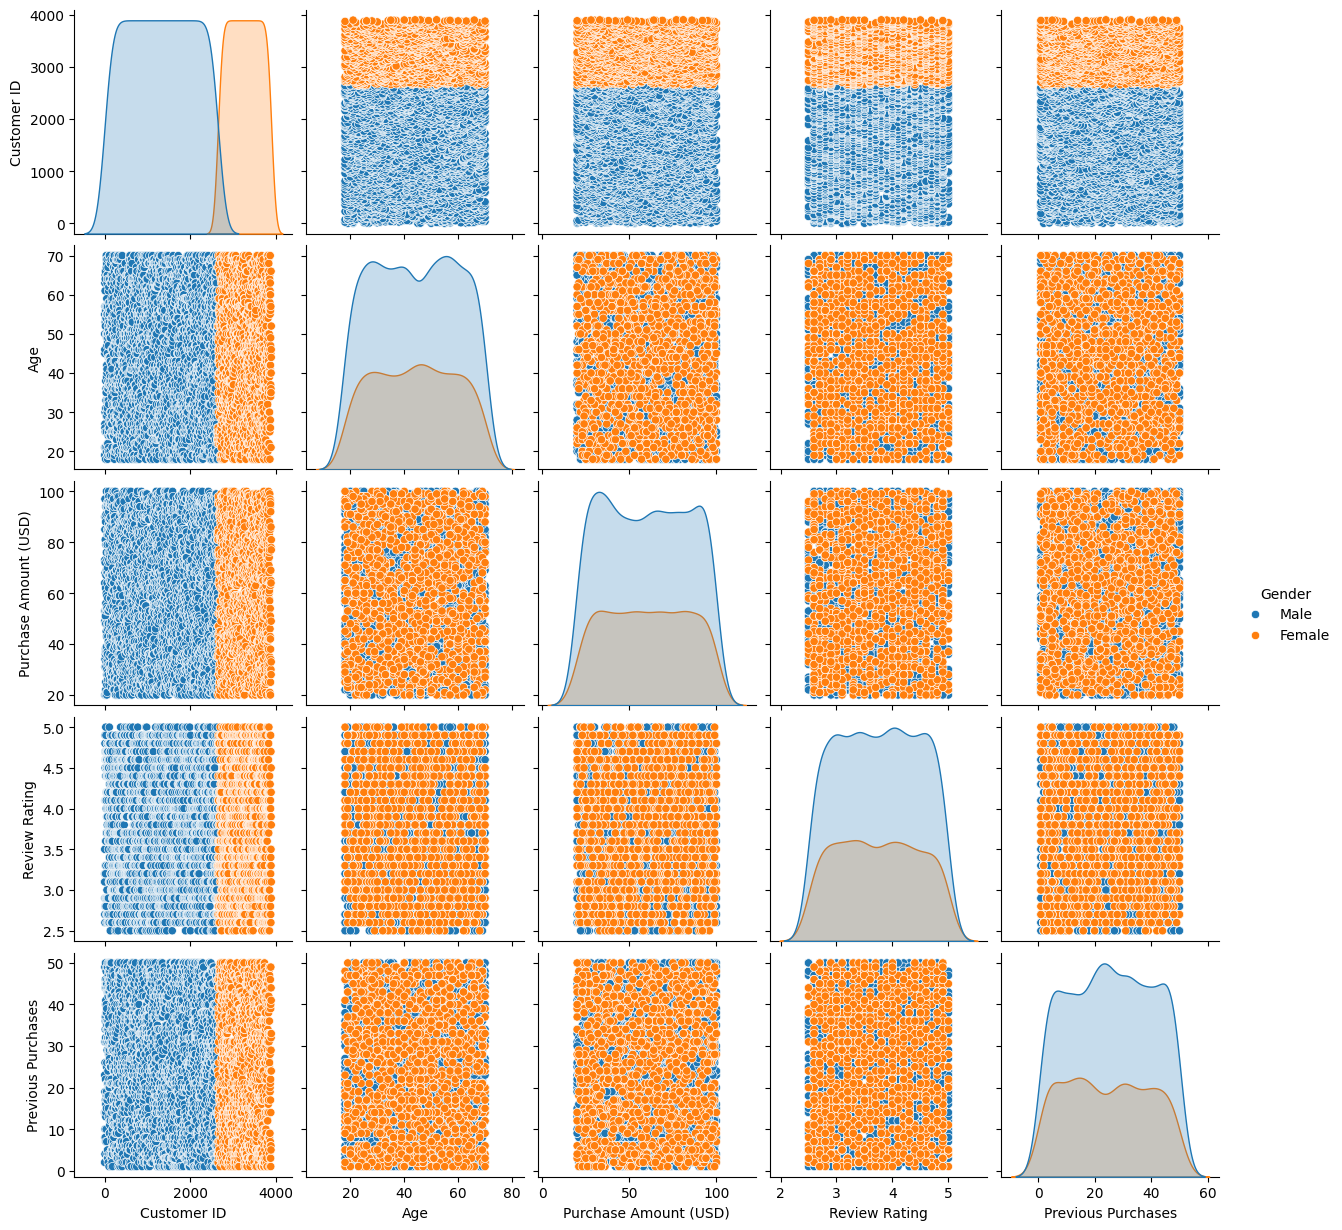

In [231]:
df
sns.pairplot(df,hue='Gender')